<a href="https://colab.research.google.com/github/prajwal467/CE888-Assignment1/blob/main/normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import scipy

In [ ]:
df = pd.read_excel('norm.xlsx')

In [ ]:
 df.iloc[1: , :]


,17.038044,18.034000,44.996998
1,[ncps],[ncps],[ppb]
2,9.822169,2967.5886,5314.6421
3,15.897066,6410.5781,11450.381
4,14.930588,5767.1919,10375.341
5,15.445284,5852.3682,10430.406
...,...,...,...
70756,22.486158,7626.9888,9078.3447
70757,34.297943,7702.6724,9295.2539
70758,56.85577,7371.3447,9061.2705
70759,-100.72176,7456.0903,9360.1182


In [ ]:
df.rename(columns = {17.038044:'ch4',18.034000:'nh',44.996998:'co2'}, inplace = True)


In [ ]:
df1 = df.iloc[1:]


In [ ]:
df2 = df1.iloc[1:]


In [ ]:
df46 = df2[1:200]

In [ ]:
df46.head()

,ch4,nh,co2
3,15.897066,6410.5781,11450.381
4,14.930588,5767.1919,10375.341
5,15.445284,5852.3682,10430.406
6,13.313373,6028.2261,10724.424
7,11.205954,5910.2944,10674.135


In [ ]:
df2_min_max_scaled = df46.copy()


In [ ]:
for column in df2_min_max_scaled.columns:
    df2_min_max_scaled[column] = (df2_min_max_scaled[column] - df2_min_max_scaled[column].min()) / (df2_min_max_scaled[column].max() - df2_min_max_scaled[column].min())    

In [ ]:
df2_min_max_scaled.head(10)

,ch4,nh,co2
3,0.003717,1.0,0.012472
4,0.003125,0.34843,0.0
5,0.00344,0.434689,0.000639
6,0.002135,0.612784,0.00405
7,0.000845,0.493353,0.003466
8,0.002426,0.473403,0.003061
9,0.004203,0.442721,0.003602
10,0.002493,0.401946,0.00238
11,0.00084,0.704043,0.006062
12,0.002769,0.446791,0.002962


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
pip install chart_studio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install peakutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import plotly.graph_objs as go
import plotly.tools as tools
import plotly.figure_factory as ff
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy
import peakutils

In [ ]:
table = FF.create_table(df46)
iplot(table, filename='apple-data-sample')


/usr/local/lib/python3.8/dist-packages/plotly/tools.py:590: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [ ]:
data = df46['nh']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Constant')
iplot(fig, filename='apple-data-normalize-constant')

<ipython-input-60-fa249c908400>:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

<ipython-input-60-fa249c908400>:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead



In [ ]:
import seaborn as sns


TypeError: ignored

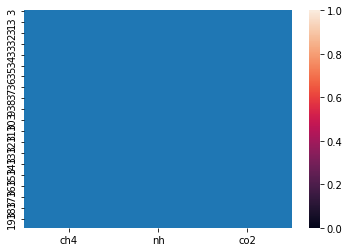

In [ ]:
sns.heatmap(df2_min_max_scaled)

In [ ]:
data_norm_to_0_1 = [number/scipy.linalg.norm(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data',
)

trace2 = go.Histogram(
    x=data_norm_to_0_1,
    opacity=0.75,
    name='normalized to [0,1]',
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize to [0,1]')
iplot(fig, filename='apple-data-normalize-0-1')